In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

red = pd.read_csv('C:/Users/bigdata/Documents/ds_study/data/practice/winequality-red.csv',sep = ';')
white = pd.read_csv('C:/Users/bigdata/Documents/ds_study/data/practice/winequality-white.csv',sep = ';')

red['color'] =1
white['color'] = 0

wine = pd.concat([red, white])
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]


x = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']


x_tr,x_t,y_tr,y_t = train_test_split(x, y, test_size = 0.2, random_state= 0xC0FFEE)

In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [4]:
from sklearn.model_selection import train_test_split

x_tr,x_t,y_tr,y_t = train_test_split(x_sc, y, test_size = 0.2, random_state= 0xC0FFEE)

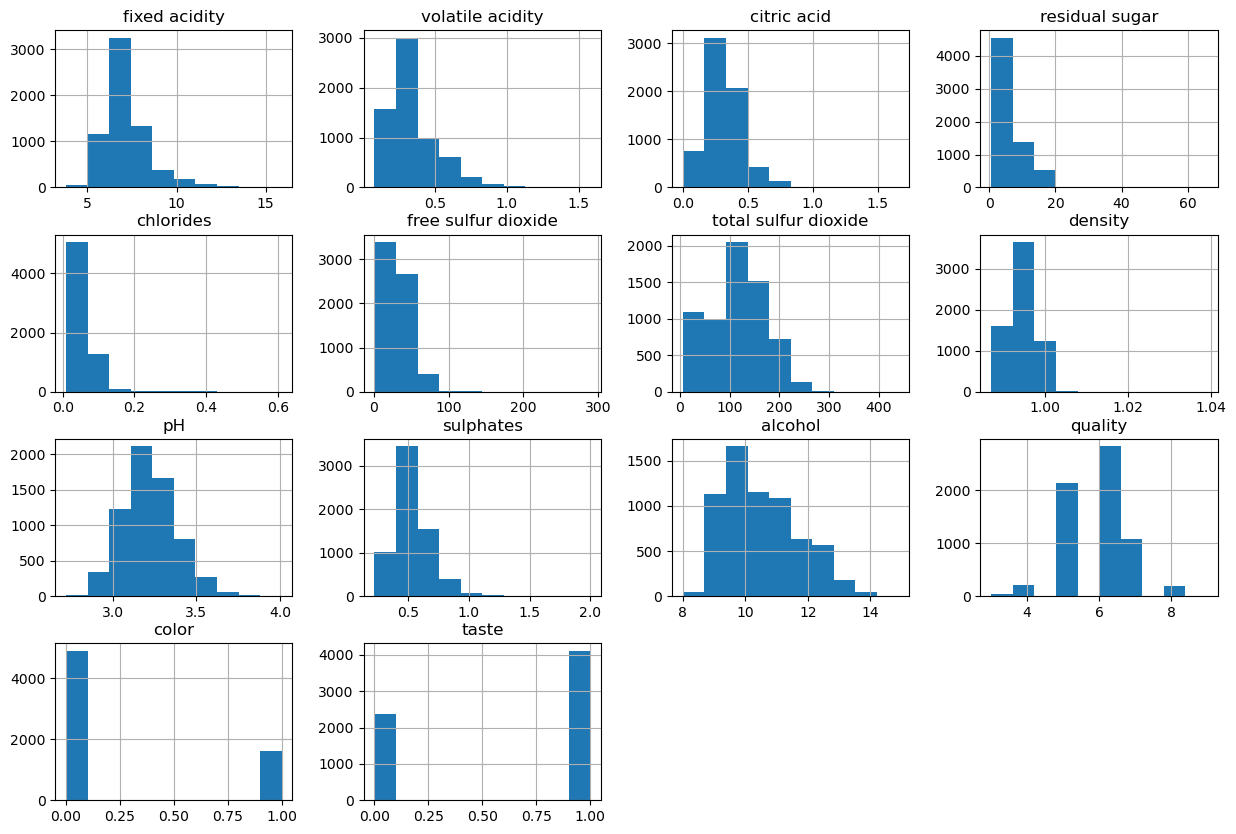

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

wine.hist(bins = 10, figsize = (15,10));

In [7]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color', 'taste'],
      dtype='object')

In [9]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df_pivot_table = wine.pivot_table(column_names, ['quality'], aggfunc = 'median')
df_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,10.15,0.0550,0.33,0.995900,7.45,17.0,3.245,3.15,0.505,102.5,0.415
4,10.00,0.0505,0.26,0.994995,7.00,15.0,3.220,2.20,0.485,102.0,0.380
5,9.60,0.0530,0.30,0.996100,7.10,27.0,3.190,3.00,0.500,127.0,0.330
6,10.50,0.0460,0.31,0.994700,6.90,29.0,3.210,3.10,0.510,117.0,0.270
7,11.40,0.0390,0.32,0.992400,6.90,30.0,3.220,2.80,0.520,114.0,0.270
8,12.00,0.0370,0.32,0.991890,6.80,34.0,3.230,4.10,0.480,118.0,0.280
9,12.50,0.0310,0.36,0.990300,7.10,28.0,3.280,2.20,0.460,119.0,0.270


In [10]:
corr_matrix = wine.corr()
print(corr_matrix['quality'].sort_values(ascending= False))

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


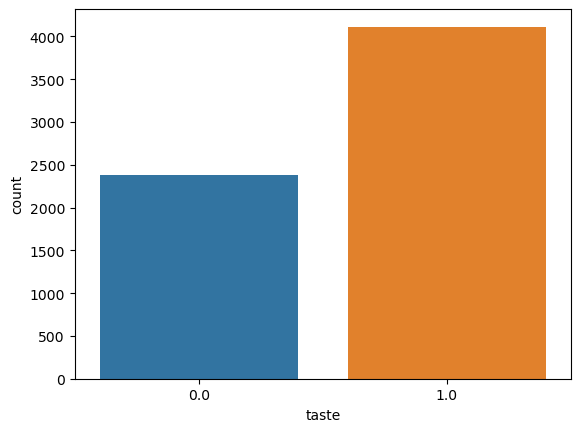

In [16]:
import seaborn as sns

sns.countplot(data = wine, x = 'taste')
plt.show()

### 🌟아래의 방식으로 모델을 한번에 테스트하고, 그 결과를 저장하는 과정 중요!

In [18]:
from sklearn.ensemble import (AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('LogisticRegression', LogisticRegression()))


In [19]:
models

[('RandomForestClassifier', RandomForestClassifier()),
 ('DecisionTreeClassifier', DecisionTreeClassifier()),
 ('AdaBoostClassifier', AdaBoostClassifier()),
 ('GradientBoostingClassifier', GradientBoostingClassifier()),
 ('LogisticRegression', LogisticRegression())]

In [20]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits = 5, random_state =13, shuffle = True)
    cv_results = cross_val_score(model, x_tr, y_tr, cv = kfold, scoring = 'accuracy')

    results.append(cv_results)
    names.append(name)
    print( name, cv_results.mean(), cv_results.std())

RandomForestClassifier 0.8241311912341749 0.01289007022457516
DecisionTreeClassifier 0.7617874065299475 0.014561563215158389
AdaBoostClassifier 0.7569754571703561 0.010509625991908475
GradientBoostingClassifier 0.7754468053601837 0.007913815639583818
LogisticRegression 0.7465834382172207 0.007650263680941423


In [22]:
results

[array([0.82692308, 0.81153846, 0.81713186, 0.81713186, 0.8479307 ]),
 array([0.75576923, 0.75865385, 0.79018287, 0.74879692, 0.75553417]),
 array([0.76346154, 0.74903846, 0.75649663, 0.74302214, 0.77285852]),
 array([0.7875    , 0.76634615, 0.77285852, 0.76900866, 0.78152069]),
 array([0.75769231, 0.74134615, 0.73532243, 0.74975938, 0.74879692])]

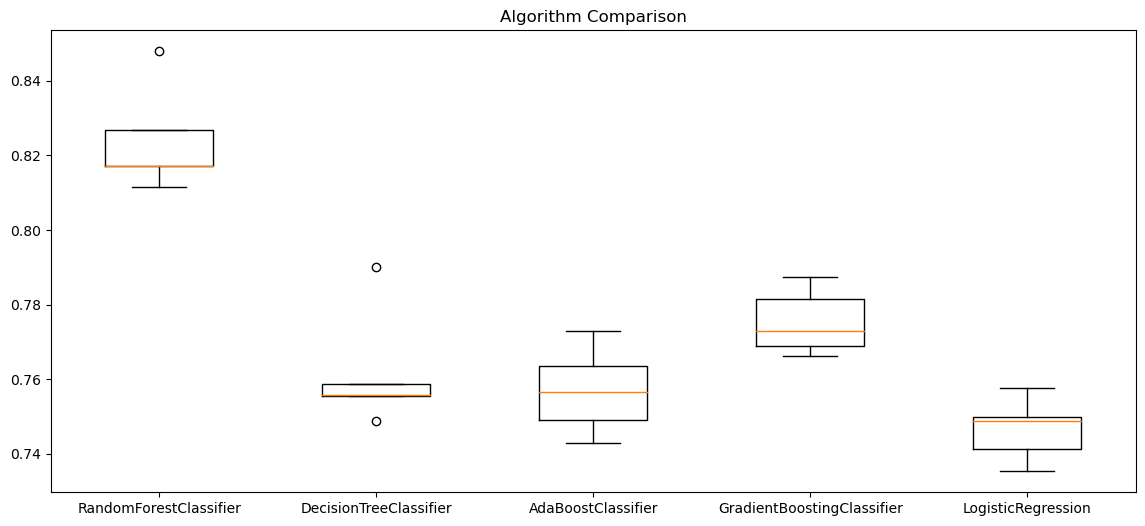

In [26]:
fig = plt.figure(figsize = (14,6))
ax = fig.add_subplot(111)
ax.set_title('Algorithm Comparison')
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show();

In [27]:
from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(x_tr, y_tr)
    pred = model.predict(x_t)
    acc = accuracy_score(y_t, pred)
    print(name, acc)

    

RandomForestClassifier 0.8261538461538461
DecisionTreeClassifier 0.7992307692307692
AdaBoostClassifier 0.7461538461538462
GradientBoostingClassifier 0.7630769230769231
LogisticRegression 0.7253846153846154
